## 통계분석할때 주의해야할 점 / 통계치의 함정.

In [ ]:
엔스컴콰르텔(Anscombe's Quartet) 
데이터의 시각화의 중요성을 강조하기 위해 사용되는 예시 집합.
통계적인 속성이 동일하게 나타나지만 시각적으로는 완전히 다른 네개의 데이터 세트로 구성됨

이를통해 데이터 분석시 시각화의 중요성과 단순한 수치로만 의존하는것이 문제가 될수있다는것을 강조.

In [ ]:
심슨의 역설(Simpson's paradox) 
       심슨이라는 통계학자가 정리한역설 , 
       
       K 대학교에 대입시험쳐서 남학생 뽑을때
                   지원자       합격자         합격률
       남학생      1000명       730명          73%
       
                   지원자       합격자         합격률
       여학생      1000명       270명          27%
       
어떻게 보면 남학생 특혜있을것으로 보이는데 
       과별로 나누면 
       
       전산학과 
                   지원자       합격자         합격률
       남학생      900          720명          80%
       
                   지원자       합격자         합격률
       여학생      200          180명          90%
       
    여학생이 합격률이 더높다. 
     
한덩어리로 통계를 내면  이런것처럼 괴리가 생기는걸 심슨의 역설 . (평균의 함정이라고 부르기도함)
       

In [ ]:
차트 정크(Chart Junk)

좌표상에 진한 격자, 불필요한 글귀 , 불필요한그림 등 
그래프상의 정보를 이해하는데 굳이 필요하지 않은 것을 의미


In [ ]:
Lie Factor

실제 값에 비해 그림이 과장됨 
 

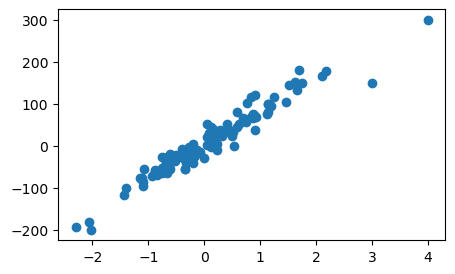

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y , coef = make_regression(n_samples = 100 , n_features = 1 , noise = 20 ,
                coef = True , random_state = 1)

#(3 , 150) , (4 , 300) 추가
X = np.vstack([X, np.array([[3],[4]])])
y = np.hstack([y , np.array([150,300])])

plt.figure(figsize =(5,3))
plt.scatter(x= X , y=y)
plt.show()

In [2]:
import statsmodels.api as sm 

model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
# print(result.summary()) #전체 설명보기 Regression result 보기 

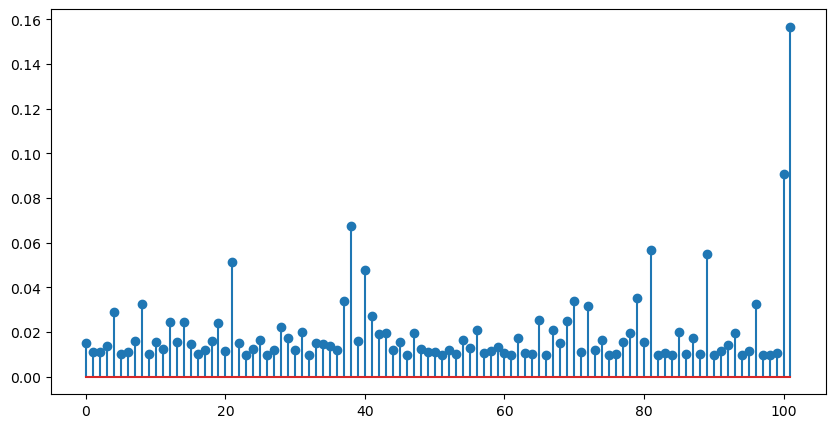

In [3]:
hat = result.get_influence().hat_matrix_diag


plt.figure(figsize= (10,5))
plt.stem(hat)
plt.show()
#저 2개 이상치가 이모델에 미친 영향이 크다는걸 알수있다.
#수학적으로 전체를 합하면 2개 되야함(102개의 레버리지 값을)

In [87]:
hat.sum()

2.0000000000000004

In [88]:
hat.mean()
#2~3배 정도 조금 크면 크다고 얘기함. 

0.019607843137254905

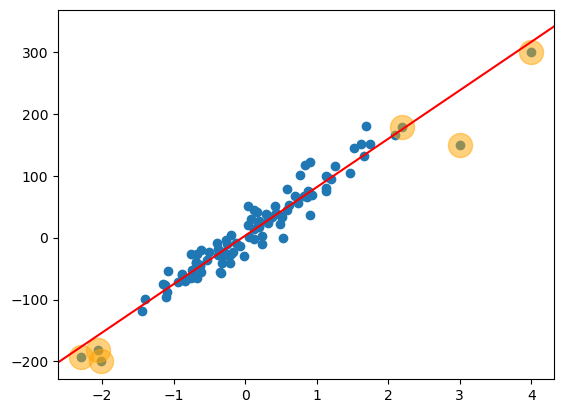

In [89]:
ax = plt.subplot()
ax.scatter(x= X , y=y) #원본 데이터 

sm.graphics.abline_plot(model_results= result,ax =ax, color ="r") #모델이 학습한 최적의 선형 가중치. 

lev = hat > 0.05 
plt.scatter(X[lev],y[lev] ,s =300, c='orange',alpha=0.5) #레버리지 (>0.05) 마킹 

plt.show()

#여기까지한게 outliner 들 영향많이 미치니깐. 이걸 찾는방법들임. 
#그리고 제거해서 모델 결정선이 어떻게 바뀌는지 확인하는지 .

# ★★
# 무리에서 떨어져있으면 레버리지가 크다 그리고 멀어질수록 영향력이 크다 . 

In [35]:
np.argmax(hat)

101

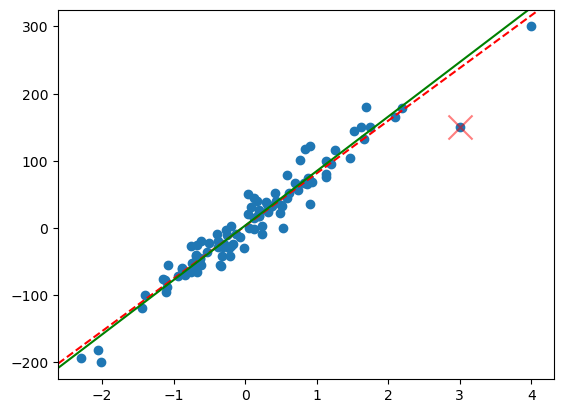

In [90]:
idx = np.array(list(range(100))+[101])

model3 = sm.OLS(y[idx], sm.add_constant(X[idx]))
result3 = model3.fit()
# print(result2.summary()) 

ax = plt.subplot()
ax.scatter(x= X , y=y)  

sm.graphics.abline_plot(model_results= result,ax =ax, color ="r", linestyle ="--") #모델   결정선
sm.graphics.abline_plot(model_results= result3,ax =ax, color ="g" ) #모델 3 결정선
lev = hat > 0.05 
plt.scatter(X[100],y[100] ,marker="x",s =300, c='r',alpha=0.5) 
plt.show() 

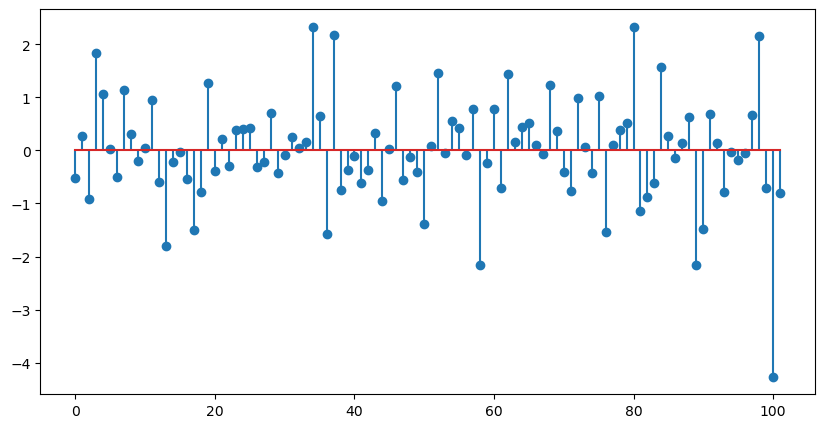

In [91]:
 #residual 잔차  (실제값 - 예측값)
#결과가 얼마나 엇나가는가~~


plt.figure(figsize= (10,5))
# plt.stem(result.resid)
plt.stem(result.resid_pearson)  
plt.show()

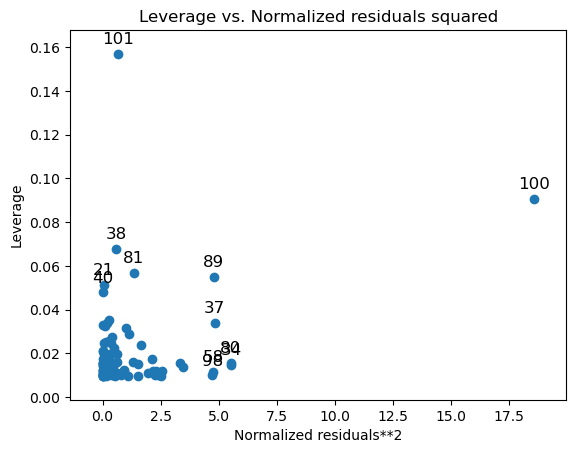

In [92]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

In [95]:
influ = result.get_influence()
cooks , pvals = influ.cooks_distance

fox = 4 / (len(y) - influ.k_vars -1)  
fox

0.04040404040404041

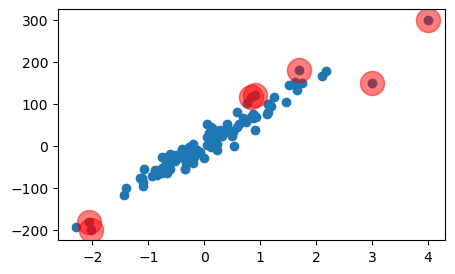

In [98]:
outlier = cooks > fox

plt.figure(figsize =(5,3))
plt.scatter(x= X , y=y)
plt.scatter(X[outlier],y[outlier], s=300 ,c="r", alpha=0.5)
plt.show()
#이게 fox에 따라서 레버리지랑 레지듀얼로 찾은 아웃라이너 (이상치) 

#7개를 빼고 모델을 학습을 한다면 좀더 안정적인 모델이 될것이다. 
#(데이터가 선형이기 때문에 가능함 -> 선형만 가능 )
#데이터가 많으면 상관없는데 데이터가 엄청 적으면  

#비선형이면 polynormial? 그걸로 펴주고 나서 일련을 과정을 거침. 
#또는 데이터많으면  박스 플롯 그려서 범위 밖에있는애들 다 날리는방법. 하면됨 


In [ ]:
다중공정선 
특성선택할때 키 몸무게 bmi 있을때 키 몸무게가 비슷해 mbi 까지 넣어버리면 중복된 값이 되서 지워준다 말했음



In [4]:
from statsmodels.datasets.longley import load_pandas
import pandas as pd
 #Longley -> 1947~1962 년까지의 인구 , 국가총생산 총노동자수 통계낸 데이터셋 
    
longley = load_pandas()
y = longley.endog
X = longley.exog
df= pd.concat([y,X], axis=1)
df

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,63639.0,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,64989.0,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,63761.0,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,66019.0,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,67857.0,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


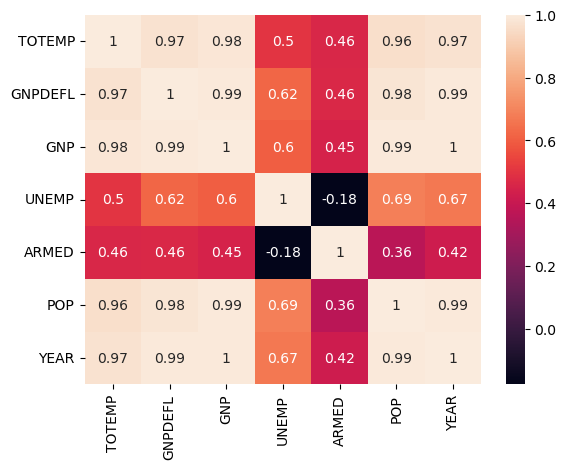

<Figure size 640x480 with 0 Axes>

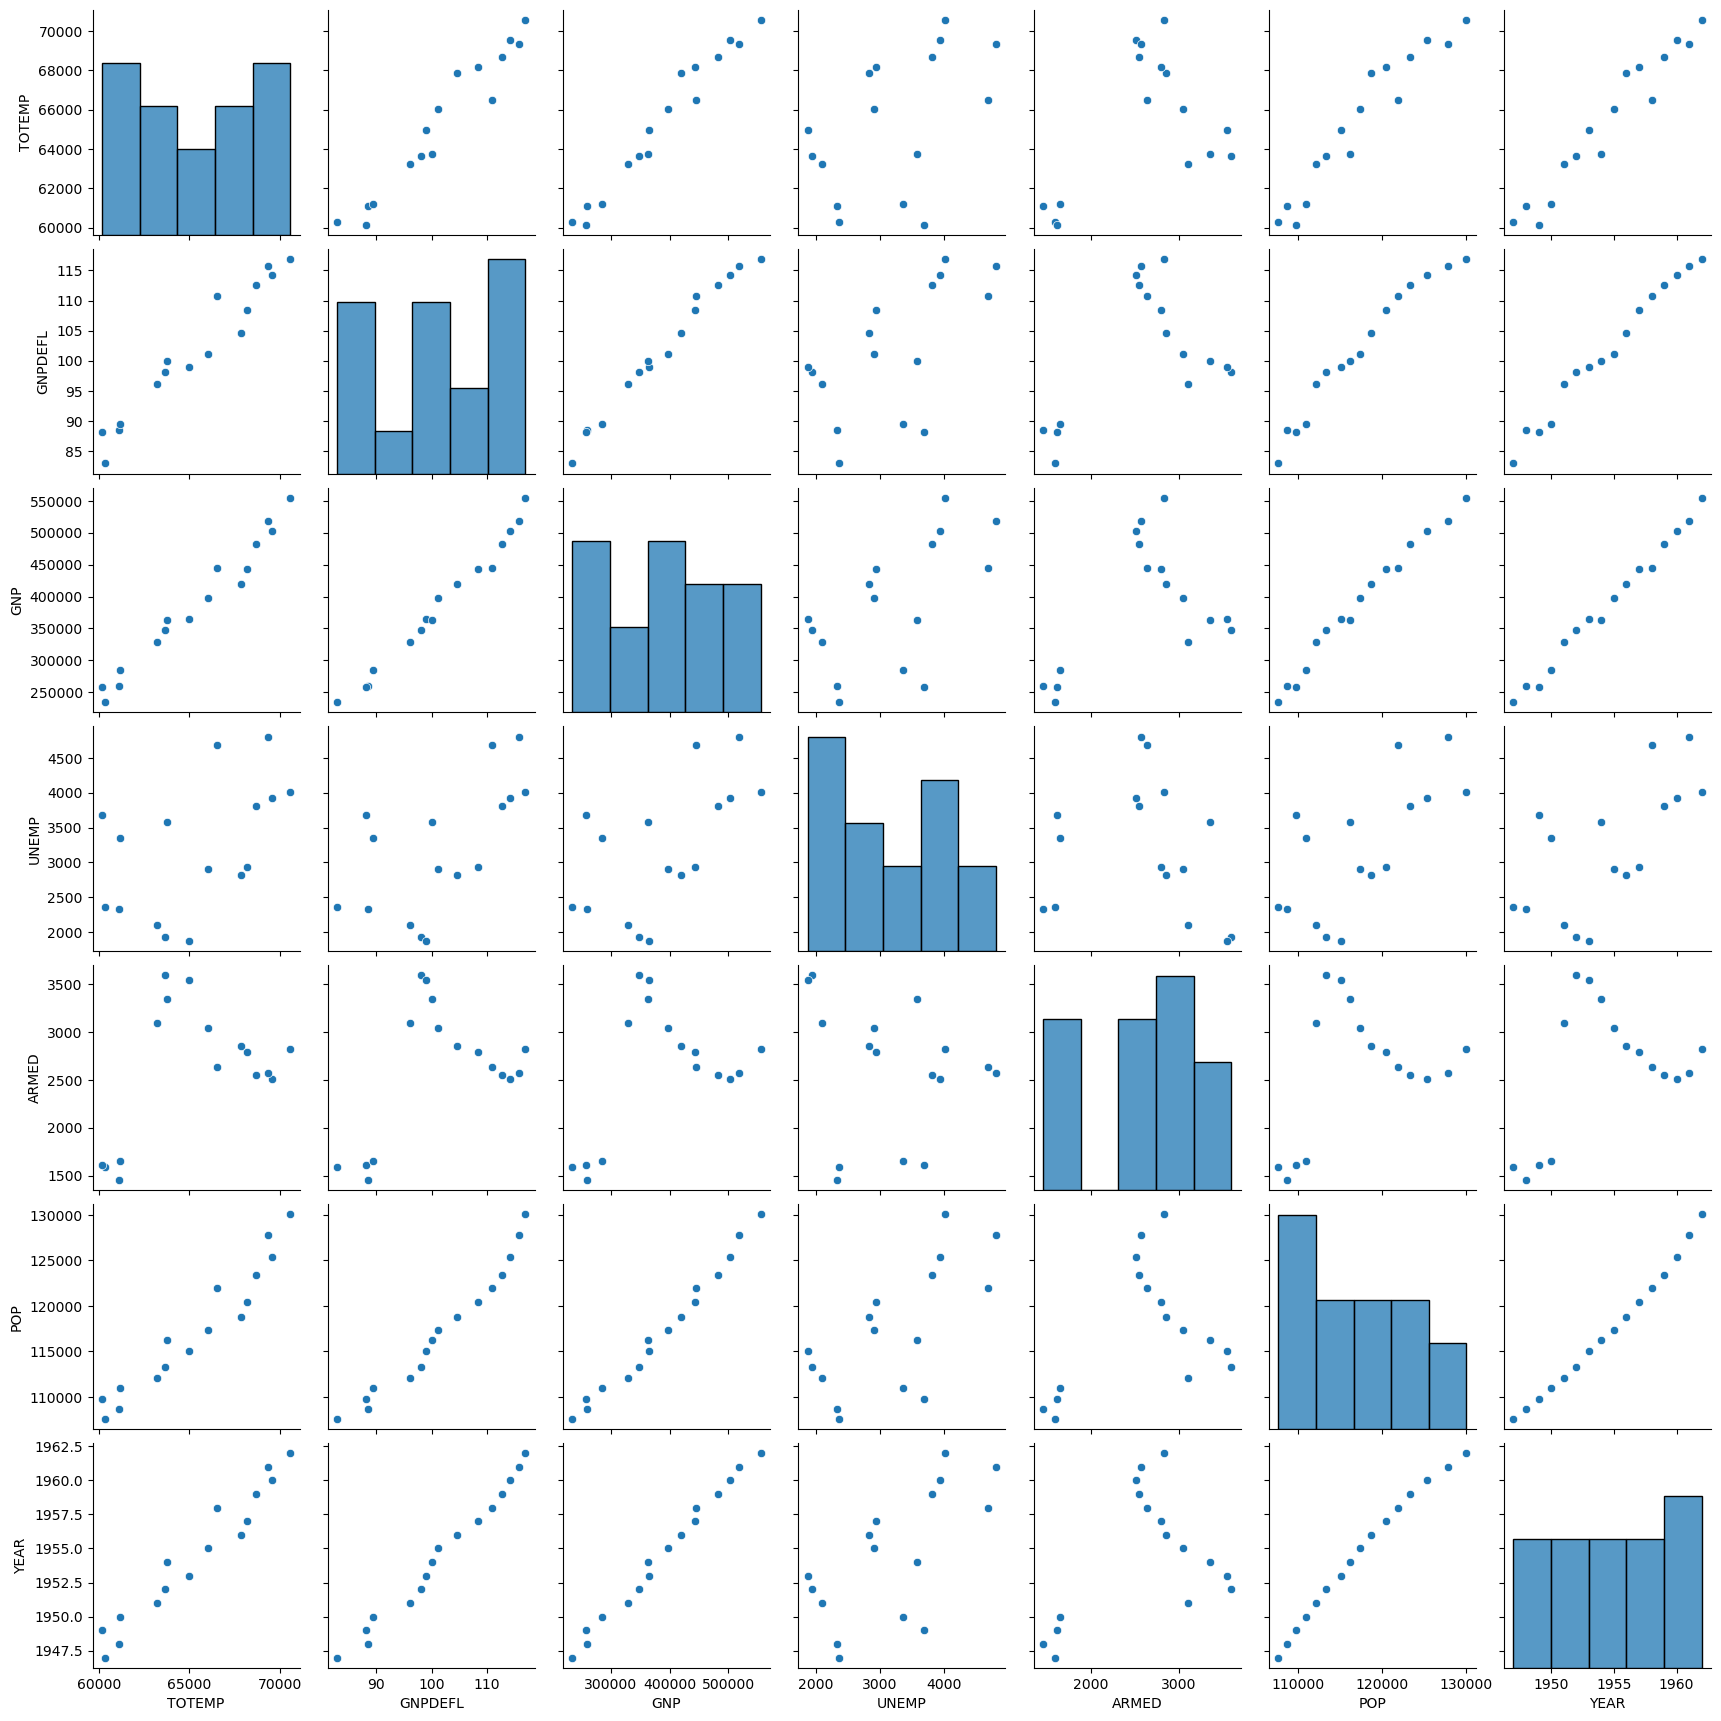

In [5]:
import seaborn as sns

plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.show()

plt.figure()
sns.pairplot(df)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df , test_size=0.4 , random_state=0)
model = sm.OLS(df_train["TOTEMP"], df_train.iloc[:,1:])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 TOTEMP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.423e+04
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                    2.44e-07
Time:                        15:53:37   Log-Likelihood:                         -62.528
No. Observations:                   9   AIC:                                      137.1
Df Residuals:                       3   BIC:                                      138.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
from sklearn.metrics import r2_score

p_test = result.predict(df_test.iloc[:,1:])
r2_score(df_test["TOTEMP"],p_test)


0.9310212700728547

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#     VIF값이 맞출수있으면 크게 나오고 못맞칠것같으면 작게나음 
#     다중공정성이 낮으면 독립적인 변수라고 볼수있음. 
#     (R2 : X의 나머지 변수들을 가지고 그변수를 맞출수있느냔 없는냐의 얘기 )


vif= []
for i in range(0,6):
    vif.append(variance_inflation_factor(X,i))

    
vif

[12425.514335354637,
 10290.435436791722,
 136.2243535629104,
 39.9833855829122,
 101193.16199321792,
 84709.9504430369]

In [9]:
for column , v in zip(X.columns , vif):
    print(column, v)
    
#    ex) ARMED 가 POP하고 관련이없어서 POP을 지우면 더 낮게 나옴 

GNPDEFL 12425.514335354637
GNP 10290.435436791722
UNEMP 136.2243535629104
ARMED 39.9833855829122
POP 101193.16199321792
YEAR 84709.9504430369


In [14]:
vif = pd.DataFrame()

vif1= []
for i in range(0,6):
    vif1.append(variance_inflation_factor(X,i))
    
vif['vif'] = vif1
vif["feature"]= X.columns
vif

,vif,feature
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [11]:
vif.sort_values("vif")

,vif,feature
3,39.983386,ARMED
2,136.224354,UNEMP
1,10290.435437,GNP
0,12425.514335,GNPDEFL
5,84709.950443,YEAR
4,101193.161993,POP


In [20]:
model2 = sm.OLS.from_formula(\
                            "TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)",
                            data=df_train)
result2 = model2.fit()
# print(result2.summary())
p_test = result2.predict(df_test.loc[:,["ARMED","UNEMP","GNP"]])
r2_score(df_test["TOTEMP"], p_test)

0.9704838852506745

In [23]:
vif = pd.DataFrame()
X_cleaned = X.loc[:,["ARMED","UNEMP","GNP"]]
vif["vif"] = [variance_inflation_factor(X_cleaned,i)\
                for i in range(X_cleaned.shape[1])]
vif["feature"] = X_cleaned.columns
vif

,vif,feature
0,17.582863,ARMED
1,22.075676,UNEMP
2,51.956598,GNP


In [33]:
boston = pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/boston.csv")
X = boston.drop(columns = ["ID","MEDV","CMEDV","TOWN"])
X

,TOWNNO,TRACT,LON,LAT,x,y,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0,2011.0,-70.9550,42.2550,338.73,4679.73,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,2021.0,-70.9500,42.2875,339.23,4683.33,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,2022.0,-70.9360,42.2830,340.37,4682.80,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,2.0,2031.0,-70.9280,42.2930,341.05,4683.89,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,2.0,2032.0,-70.9220,42.2980,341.56,4684.44,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,91.0,1801.0,-70.9860,42.2312,336.11,4677.14,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,91.0,1802.0,-70.9910,42.2275,335.69,4676.74,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,91.0,1803.0,-70.9948,42.2260,335.37,4676.58,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,91.0,1804.0,-70.9875,42.2240,335.97,4676.35,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [34]:
vif = pd.DataFrame()

vif["vif"] = [variance_inflation_factor(X,i)\
                for i in range(X.shape[1])]
vif["feature"] = X.columns
vif.sort_values("vif")

,vif,feature
9,1.190814e+00,CHAS
6,2.148796e+00,CRIM
7,2.967360e+00,ZN
18,1.231521e+01,LSTAT
8,1.498360e+01,INDUS
17,2.222587e+01,B
0,2.322620e+01,TOWNNO
12,2.388794e+01,AGE
14,2.762313e+01,RAD
13,3.064329e+01,DIS


In [ ]:
#LON 하고 LAT 이 위도 경도 라 같은거라 높음 

In [ ]:
내일실습 -> 회귀 분류 해서 클루스터링 해볼것임 ㅌ

분석과정이 다름. 